# SNS injection painting

In [914]:
import sys
import importlib
import os
from os.path import join

import numpy as np
import pandas as pd
from matplotlib import animation
from matplotlib import pyplot as plt
from tqdm import tqdm
from tqdm import trange
import proplot as pplt 
import seaborn as sns

sys.path.append('..')
from tools import animation as myanim
from tools import beam_analysis as ba
from tools import plotting as myplt
from tools import utils

## Settings

In [915]:
plt.rcParams['animation.html'] = 'jshtml'
plt.rcParams['savefig.dpi'] = 'figure'
plt.rcParams['savefig.transparent'] = False
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['grid.alpha'] = 0.04
plt.rcParams['axes.grid'] = False
savefig_kws = dict(facecolor='white', dpi=300)
n_bins_hist2d = 50

In [916]:
folder = '_output/data/'
location = 'injection point' # {'injection point', 'rtbt entrance'}

In [917]:
utils.delete_files_not_folders('_output/figures/')

## Matched eigenvector 

In [918]:
# matched_eigvec = np.load('matched_eigenvector.npy')
# matched_env_params = np.load('matched_env_params.npy')

# eps = 40e-6 # intrinsic emittance [mm mrad]
# n_parts = 10000
# radii = np.sqrt(np.random.uniform(0, 4 * eps, size=(n_parts, 1)))
# phases = np.linspace(0, 2 * np.pi, n_parts).reshape(n_parts, 1) # eigenvector phase [rad]
# eigvecs = np.tile(matched_eigvec, (n_parts, 1))
# X = np.real(radii * eigvecs * np.exp(-1j * phases))

# myplt.corner(1e3 * X, 1e3 * matched_env_params);

## Injection region closed orbit

In [919]:
inj_region_coords_t0 = np.load(join(folder, 'inj_region_coords_t0.npy'))
inj_region_coords_t1 = np.load(join(folder, 'inj_region_coords_t1.npy'))
inj_region_positions_t0 = np.load(join(folder, 'inj_region_positions_t0.npy'))
inj_region_positions_t1 = np.load(join(folder, 'inj_region_positions_t1.npy'))
inj_region_coords_t0 *= 1000. # convert to mm-mrad
inj_region_coords_t1 *= 1000. # convert to mm-mrad

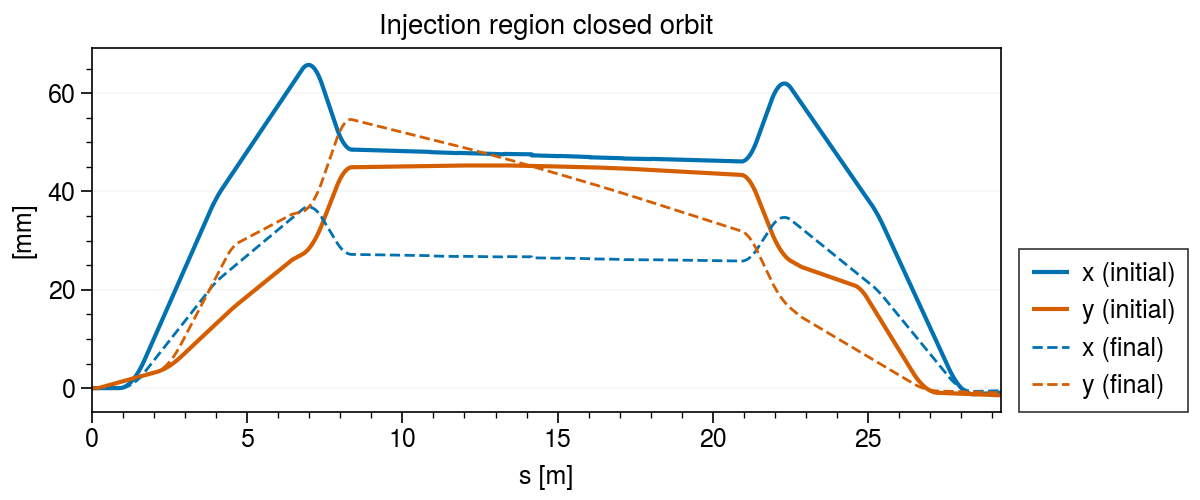

In [920]:
fig, ax = pplt.subplots(figsize=(6, 2.5))
ax.plot(inj_region_positions_t0, inj_region_coords_t0[:, 0], label='x (initial)')
ax.plot(inj_region_positions_t0, inj_region_coords_t0[:, 2], label='y (initial)')
ax.format(cycle='colorblind')
ax.plot(inj_region_positions_t1, inj_region_coords_t1[:, 0], ls='--', lw=1, label='x (final)')
ax.plot(inj_region_positions_t1, inj_region_coords_t1[:, 2], ls='--', lw=1, label='y (final)')
ax.format(title='Injection region closed orbit')
ax.legend(ncols=1, loc=(1.02, 0), handlelength=1.5);
ax.format(xlabel='s [m]', ylabel='[mm]') 
ax.grid(axis='y')
plt.savefig('_output/figures/inj_region_closed_orbit.png', **savefig_kws)

## Kicker strengths

In [921]:
# def get_perveance(kin_energy, mass, line_density):
#     classical_proton_radius = 1.53469e-18 # m
#     gamma = 1 + (kin_energy / mass) # Lorentz factor
#     beta = np.sqrt(1 - (1 / gamma)**2) # velocity/speed_of_light
#     return (2 * classical_proton_radius * line_density) / (beta**2 * gamma**3)

# ring_length = 248.0
# zlim = (135.0 / 360.0) * ring_length
# zmin, zmax = -zlim, zlim
# bunch_length = zmax - zmin

# # Production beam
# kin_energy = 1.0 # [GeV]
# mass = 0.93827231 # [kg]
# intensity = 1.5e14
# Q = get_perveance(kin_energy, mass, intensity / bunch_length)
# xmax = ymax = 26.0
# area = xmax * ymax
# print('Q = {}'.format(Q))
# density_production = Q / area
# print('Q / area = {}'.format(density_production))

# # SCBD
# kin_energy = 1.0 # [GeV]
# mass = 0.93827231 # [kg]
# max_intensity = 1.5e14
# max_n_turns = 1000.
# xmax = ymax = 26.0
# area = xmax * ymax
# densities = []
# turns = np.linspace(1, max_n_turns, 1000)
# for t in turns:
#     tau = t / max_n_turns
#     intensity = max_intensity * tau
#     Q = get_perveance(kin_energy, mass, intensity / bunch_length)
#     densities.append(Q / area)
# densities = np.array(densities)
    
# fig, ax = pplt.subplots()
# ax.plot(turns, densities, color='black');
# ymin, ymax = ax.get_ylim()
# alpha = 0.15
# ax.fill_between(turns, 0., density_production, color='green', alpha=alpha)
# ax.fill_between(turns, density_production, ymax, color='red', alpha=alpha)
# ax.format(grid=True, ylim=(0, ax.get_ylim()[1]),
#           xlabel='# turns to reach full beam size', ylabel=r'Q / area [mm$^{-2}$]')
# plt.savefig('_output/figures/perveance_scaling_{}_{}.png'.format(kin_energy, xmax))

In [922]:
kicker_angles_t0 = np.loadtxt(folder + 'kicker_angles_t0.dat')
kicker_angles_t1 = np.loadtxt(folder + 'kicker_angles_t1.dat')
kicker_names = ['ikickh_a10', 'ikickv_a10', 'ikickh_a11', 'ikickv_a11',
                'ikickv_a12', 'ikickh_a12', 'ikickv_a13', 'ikickh_a13']

In [923]:
def waveform(t, k0, k1):
    return k0 - (k0 - k1)*np.sqrt(t)

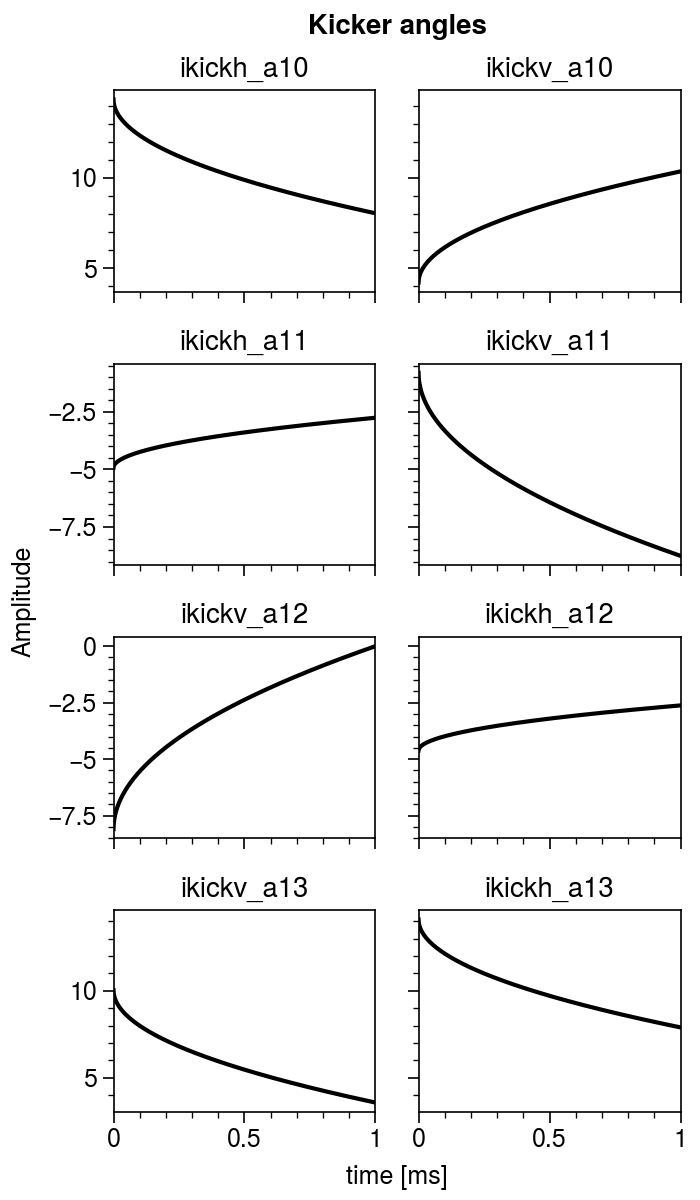

In [924]:
t = np.linspace(0, 1, 1000)

fig, axes = pplt.subplots(nrows=4, ncols=2, figsize=(3.5, 6))
for k0, k1, name, ax in zip(kicker_angles_t0, kicker_angles_t1, kicker_names, axes):
    ax.plot(t, 1000 * waveform(t, k0, k1), c='k')
    ax.format(title=name)
axes.format(ylabel='Amplitude', suptitle='Kicker angles', xlabel='time [ms]')
plt.savefig('_output/figures/kicker_angles.png', **savefig_kws)

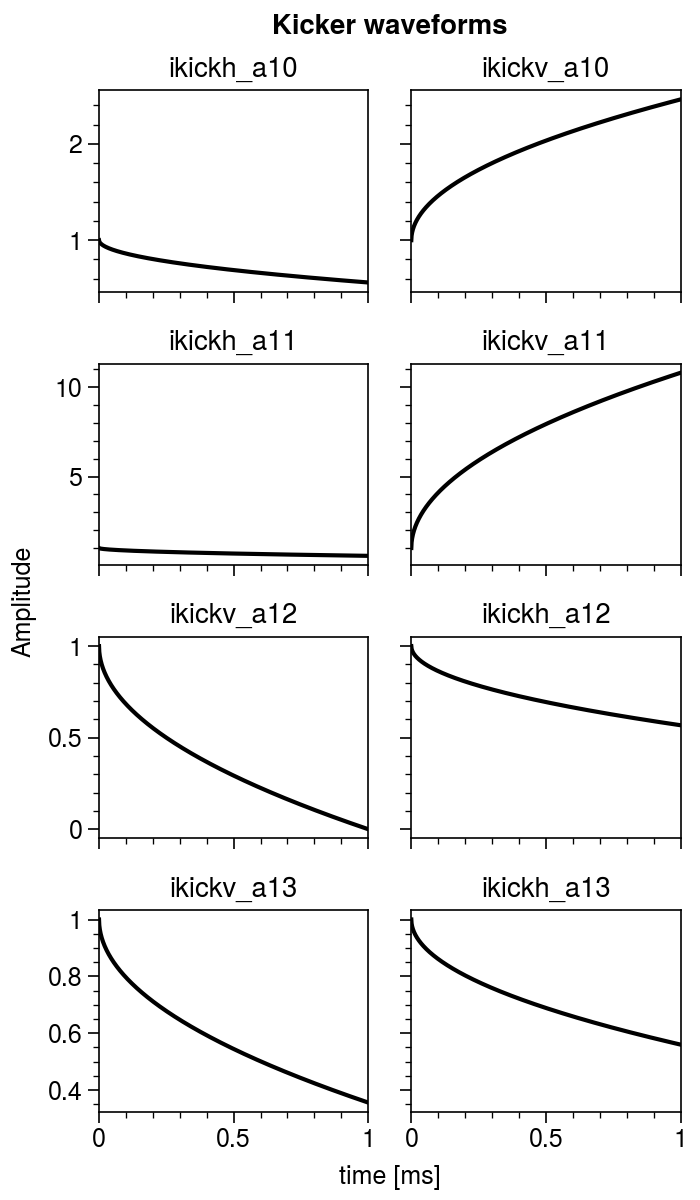

In [925]:
fig, axes = pplt.subplots(nrows=4, ncols=2, figsize=(3.5, 6))
for k0, k1, name, ax in zip(kicker_angles_t0, kicker_angles_t1, kicker_names, axes):
    ax.plot(t, waveform(t, 1.0, k1/k0), c='k')
    ax.format(title=name)
axes.format(ylabel='Amplitude', suptitle='Kicker waveforms', xlabel='time [ms]')
plt.savefig('_output/figures/kicker_waveforms.png', **savefig_kws)

## Beam statistics

In [926]:
suffix = ''
if location == 'rtbt entrance':
    suffix = '_rtbt_entrance'
filename = 'coords{}.npz'.format(suffix)
coords = utils.load_stacked_arrays(join(folder, filename))
for i in trange(len(coords)):
    coords[i][:, 5] *= 1000. # convert dE to [MeV]

100%|██████████| 300/300 [00:00<00:00, 10484.10it/s]


In [927]:
moments_list = []
for X in tqdm(coords):
    Sigma = np.cov(X[:, :4].T)
    moments_list.append(ba.mat2vec(Sigma))
moments_list = np.array(moments_list)
    
stats = ba.StatsReader()
stats.read_moments(moments_list)

100%|██████████| 300/300 [00:00<00:00, 919.49it/s] 


/Users/46h/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: ProPlotWarning: Passing labels without handles is unsupported in ProPlot. Please explicitly pass the handles to legend() or pass labels to plotting commands with e.g. plot(data_1d, label='label') or plot(data_2d, labels=['label1', 'label2', ...]). After passing labels to plotting commands you can call legend() without any arguments or with the handles as a sole positional argument.
  


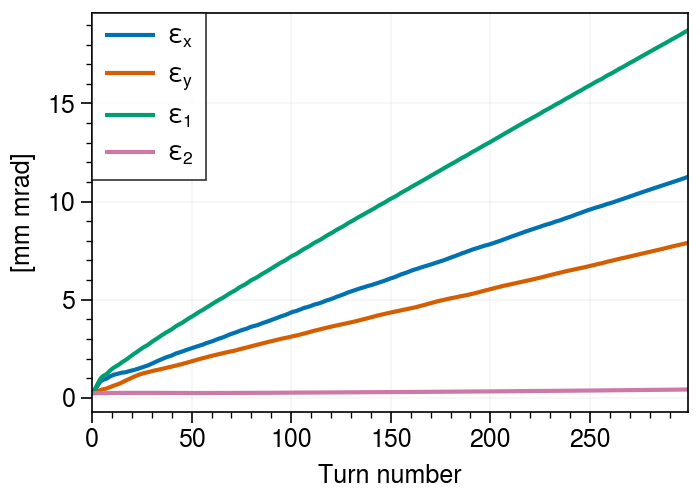

In [928]:
fig, ax = pplt.subplots(figsize=(3.5, 2.5))
plt_kws = dict(legend=False)
stats.twiss2D[['eps_x','eps_y']].plot(ax=ax, **plt_kws)
stats.twiss4D[['eps_1','eps_2']].plot(ax=ax, **plt_kws)
ax.legend(labels=[r'$\varepsilon_{}$'.format(v) for v in ['x', 'y', '1', '2']], 
          ncols=1, loc='upper left')
ax.format(ylabel='[mm mrad]', xlabel='Turn number', grid=True);
plt.savefig('_output/figures/emittances.png', **savefig_kws)

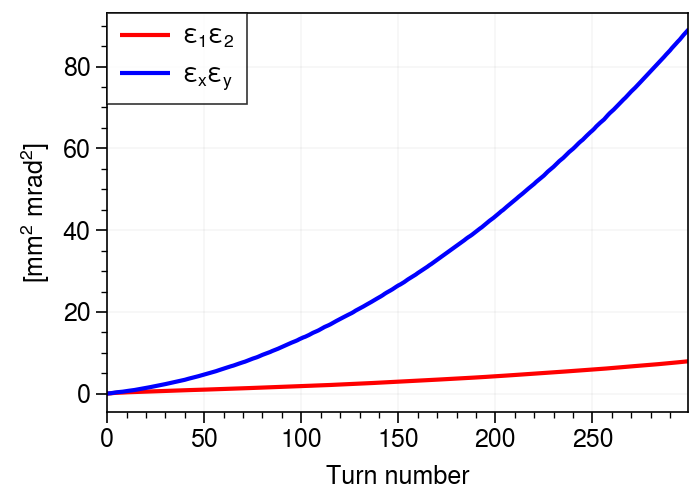

In [929]:
exey = (stats.twiss2D['eps_x'] * stats.twiss2D['eps_y']).values
e1e2 = (stats.twiss4D['eps_1'] * stats.twiss4D['eps_2']).values

fig, ax = pplt.subplots(figsize=(3.5, 2.5))
g1 = ax.plot(e1e2, color='red')
g2 = ax.plot(exey, color='blue')
ax.legend([g1, g2], labels=[r'$\varepsilon_1\varepsilon_2$', r'$\varepsilon_x\varepsilon_y$'],
          ncols=1, loc='upper left')
ax.format(xlabel='Turn number', ylabel=r'[mm$^2$ mrad$^2$]', 
          grid=True)
plt.savefig('_output/figures/emittances_4D.png', **savefig_kws)

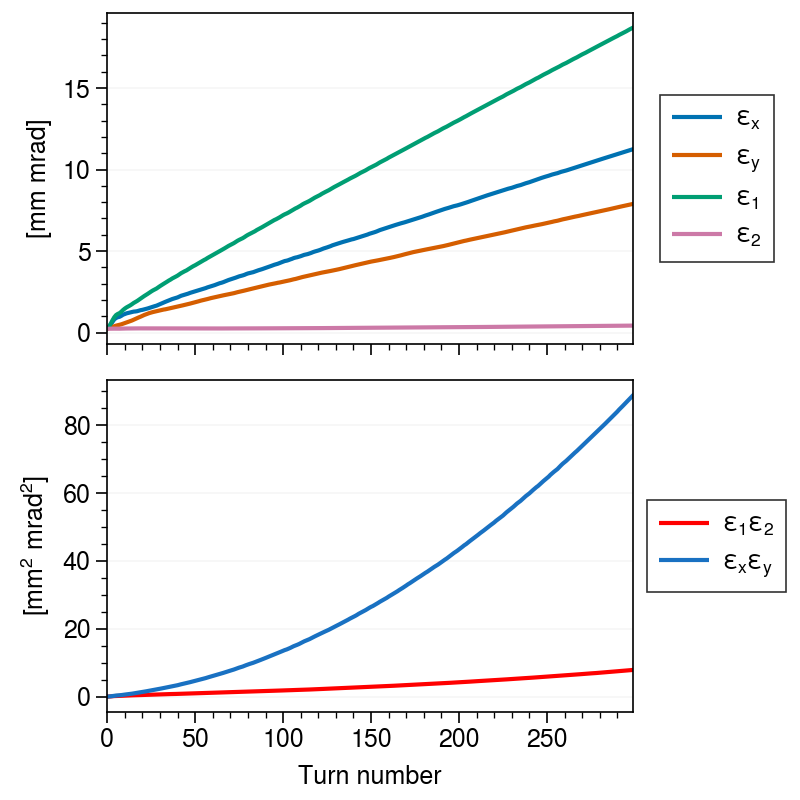

In [930]:
fig, axes = pplt.subplots(nrows=2, figsize=(4.0, 4.0), spany=False)
g1 = axes[0].plot(stats.twiss2D['eps_x'])
g2 = axes[0].plot(stats.twiss2D['eps_y'])
g3 = axes[0].plot(stats.twiss4D['eps_1'])
g4 = axes[0].plot(stats.twiss4D['eps_2'])
axes[0].legend(handles=[g1, g2, g3, g4],
               labels=[r'$\varepsilon_{}$'.format(v) for v in ['x', 'y', '1', '2']],
               ncols=1, loc='r')
g1 = axes[1].plot(e1e2, color='red')
g2 = axes[1].plot(exey, color='blue8')
axes[1].legend(handles=[g1, g2],
               labels=[r'$\varepsilon_1\varepsilon_2$', r'$\varepsilon_x\varepsilon_y$'],
               ncols=1, loc='r')
axes[0].format(ylabel='[mm mrad]', xlabel='Turn number')
axes[1].format(ylabel=r'[mm$^2$ mrad$^2$]')
for ax in axes:
    ax.grid(axis='y')
plt.savefig('_output/figures/emittances_combined.png', **savefig_kws)

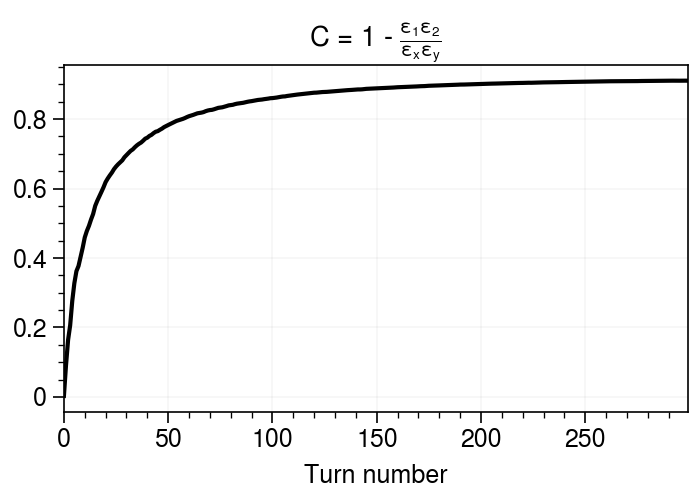

In [931]:
fig, ax = pplt.subplots(figsize=(3.5, 2.5))
C = 1.0 - (e1e2) / (exey)
ax.plot(C, c='k')
ax.format(xlabel='Turn number', 
          title=r'C = 1 - $\frac{\varepsilon_1\varepsilon_2}{\varepsilon_x\varepsilon_y}$', 
          grid=True)
plt.savefig('_output/figures/coupling_factor.png', **savefig_kws)

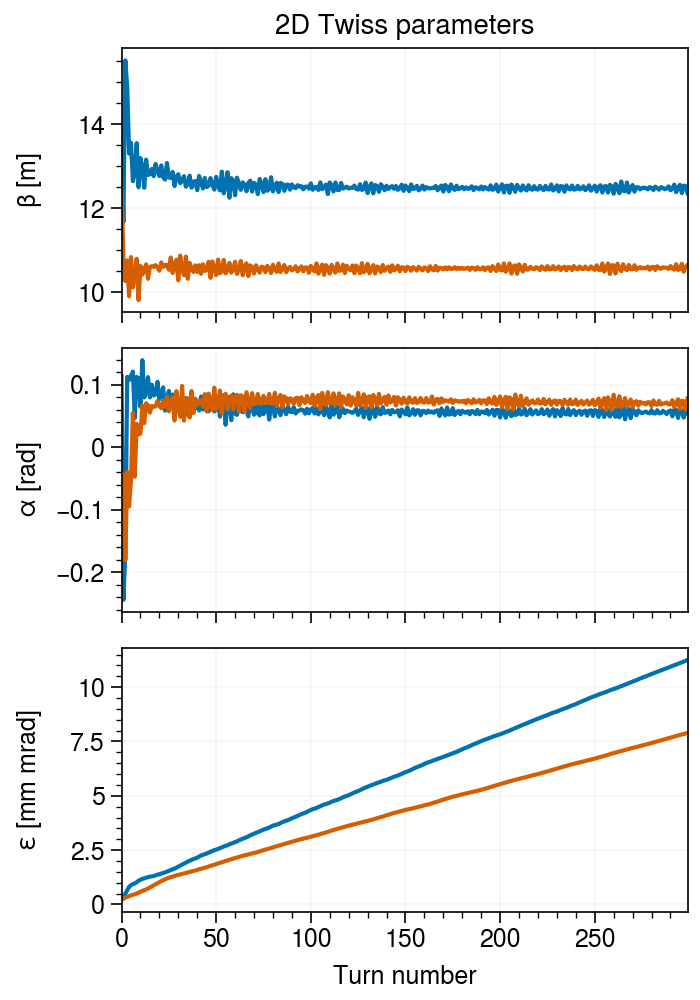

In [932]:
fig, axes = pplt.subplots(nrows=3, figsize=(3.5, 5.0), spany=False, aligny=True)
columns = (['beta_x','beta_y'], ['alpha_x','alpha_y'], ['eps_x','eps_y'])
ylabels = (r'$\beta$ [m]', r'$\alpha$ [rad]', r'$\varepsilon$ [mm mrad]')
for ax, col in zip(axes, columns):
    stats.twiss2D[col].plot(ax=ax, **plt_kws)
axes.format(xlabel='Turn number', grid=True)
axes[0].format(title='2D Twiss parameters')
myplt.set_labels(axes, ylabels, 'ylabel')
plt.savefig('_output/figures/twiss2D.png', **savefig_kws)

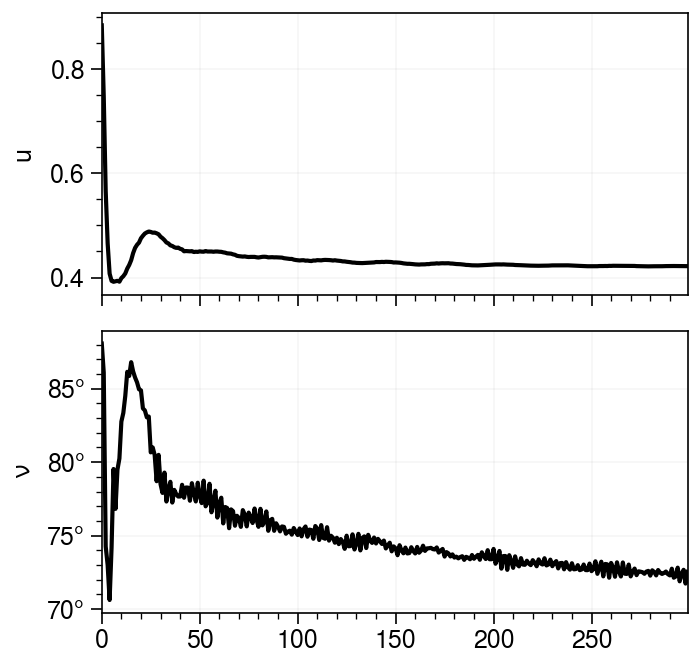

In [933]:
fig, axes = pplt.subplots(nrows=2, figsize=(3.5, 3.33), spany=False, aligny=True)
stats.twiss4D['u'].plot(color='k', ax=axes[0], **plt_kws)
stats.twiss4D['nu'].plot(color='k', ax=axes[1], **plt_kws)
axes.format(grid=True)
axes[0].format(ylabel='u')
axes[1].format(ylabel=r'$\nu$', yformatter='deg')
plt.savefig('_output/figures/u_and_nu.png', **savefig_kws)

In [934]:
stats.twiss2D.head()

,alpha_x,alpha_y,beta_x,beta_y,eps_x,eps_y,eps_x_frac,eps_y_frac
0,0.113411,-0.154808,13.319578,12.464448,0.246202,0.217802,0.530603,0.469397
1,-0.244512,-0.043027,11.677679,10.795492,0.342930,0.269079,0.560335,0.439665
2,-0.168457,-0.181267,15.526087,10.270397,0.499024,0.309257,0.617389,0.382611
3,0.112205,-0.039802,14.896203,10.759210,0.664283,0.350397,0.654672,0.345328
4,0.107216,-0.095067,13.307854,9.909941,0.804533,0.381797,0.678170,0.321830


In [935]:
stats.twiss4D.head()

,alpha_x,alpha_y,beta_x,beta_y,u,nu,eps_1,eps_2,eps_4D
0,0.113361,-0.136890,13.313706,11.021780,0.884257,88.069303,0.246310,0.217093,0.053472
1,-0.233244,-0.032205,11.139516,8.080276,0.748486,86.101163,0.359497,0.233314,0.083876
2,-0.153881,-0.102616,14.182724,5.814101,0.566103,74.267051,0.546291,0.236102,0.128980
3,0.099053,-0.018534,13.150171,5.010076,0.465655,72.996703,0.752484,0.245478,0.184718
4,0.092060,-0.038738,11.426701,4.038053,0.407475,70.621193,0.936982,0.237196,0.222248


## Tunes 

In [936]:
# mass = 0.93827231 # [GeV/c^2]
# kin_energy = 0.8 # [GeV]
# alpha_x = 0.06951453814317858
# alpha_y = 0.01091131703789978
# beta_x = 12.243573284689077
# beta_y = 12.030511575868042
# tune_calc = ba.TuneCalculator(mass, kin_energy, alpha_x, alpha_y, beta_x, beta_y)

In [937]:
# tunes_list = []
# # turns = [1, 50, 100, 150, 200, 250, 300, 350, 400, 450, 499]
# turns = [0, 5, 9]
# for t in tqdm(turns):
#     tunes = tune_calc.get_tunes(coords[t - 1], coords[t])
#     tunes_list.append(tunes)

In [938]:
# tunes = np.copy(tunes_list[2])
# tunes += 6.0
# tunes[np.where(tunes > 6.5)] -= 1.
# lim = (5.9, 6.1)
# g = sns.jointplot(
#     x=tunes[:, 0], y=tunes[:, 1],
#     xlim=lim, ylim=lim, height=4.0,
#     kind='hist', 
#     joint_kws=dict(cmap='binary'),
#     marginal_kws=dict(ec=None, color='black', bins='auto')
# )
# plt.show()

(-124.0, 124.0)

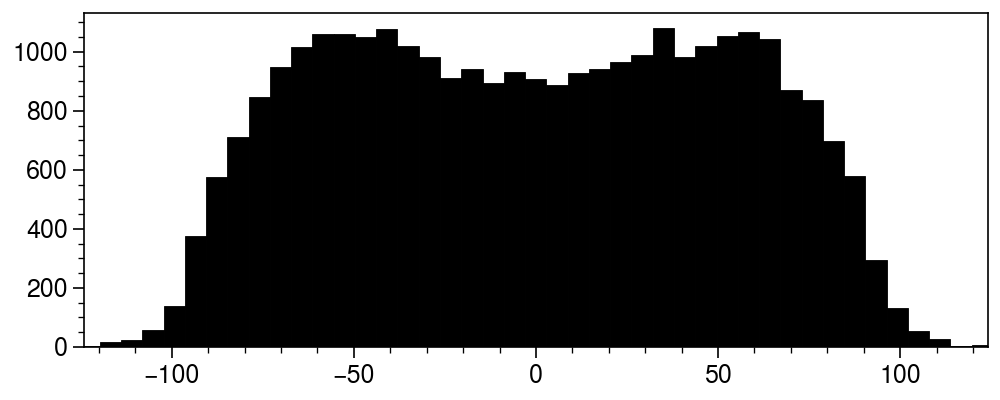

In [939]:
fig, ax = pplt.subplots(figsize=(5, 2))
ax.hist(coords[-1][:, 4], bins='auto', color='black');
ax.set_xlim(-248/2, 248/2)

In [940]:
twiss = np.load('twiss.npy')
df = pd.DataFrame(twiss, columns=['s', 'nux', 'nuy', 'alpha_x', 'alpha_y', 'beta_x', 'beta_y'])
df
# fig, ax = pplt.subplots(figsize=(12, 3))
# ax.plot(s, beta_x)
# ax.plot(s, beta_y)
# plt.show()

,s,nux,nuy,alpha_x,alpha_y,beta_x,beta_y
0,0.000000,0.000000,0.000000,0.116146,0.048043,12.215993,12.617709
1,0.109030,0.001421,0.001376,0.057972,0.039382,12.208559,12.608177
2,0.218060,0.002843,0.002753,0.105624,0.030721,12.190719,12.600534
3,1.101064,0.014433,0.013911,0.024947,-0.039422,12.082089,12.608217
4,1.596255,0.020961,0.020149,-0.002892,-0.078758,12.070376,12.666739
...,...,...,...,...,...,...,...
549,245.729537,6.173151,6.173498,0.318530,0.215916,13.073754,13.184900
550,247.244373,6.192147,6.192162,0.167362,0.096954,12.378201,12.710953
551,247.571463,6.196367,6.196267,0.124020,0.071268,12.294584,12.655929
552,247.898552,6.200615,6.200387,0.116210,0.045581,12.215993,12.617709


## TBT coordinates 

In [941]:
foil_pos = (48.6, 46.0)
coords_foil_frame = []
for X in coords:
    Y = np.copy(X)
    Y[:, 0] -= foil_pos[0]
    Y[:, 2] -= foil_pos[1]
    coords_foil_frame.append(Y)

In [942]:
turn = -1
pad = -0.1
bins = 75
hist_height_frac = 0.6
plot_kws = dict(bins=bins, pad=pad, hist_height_frac=hist_height_frac)

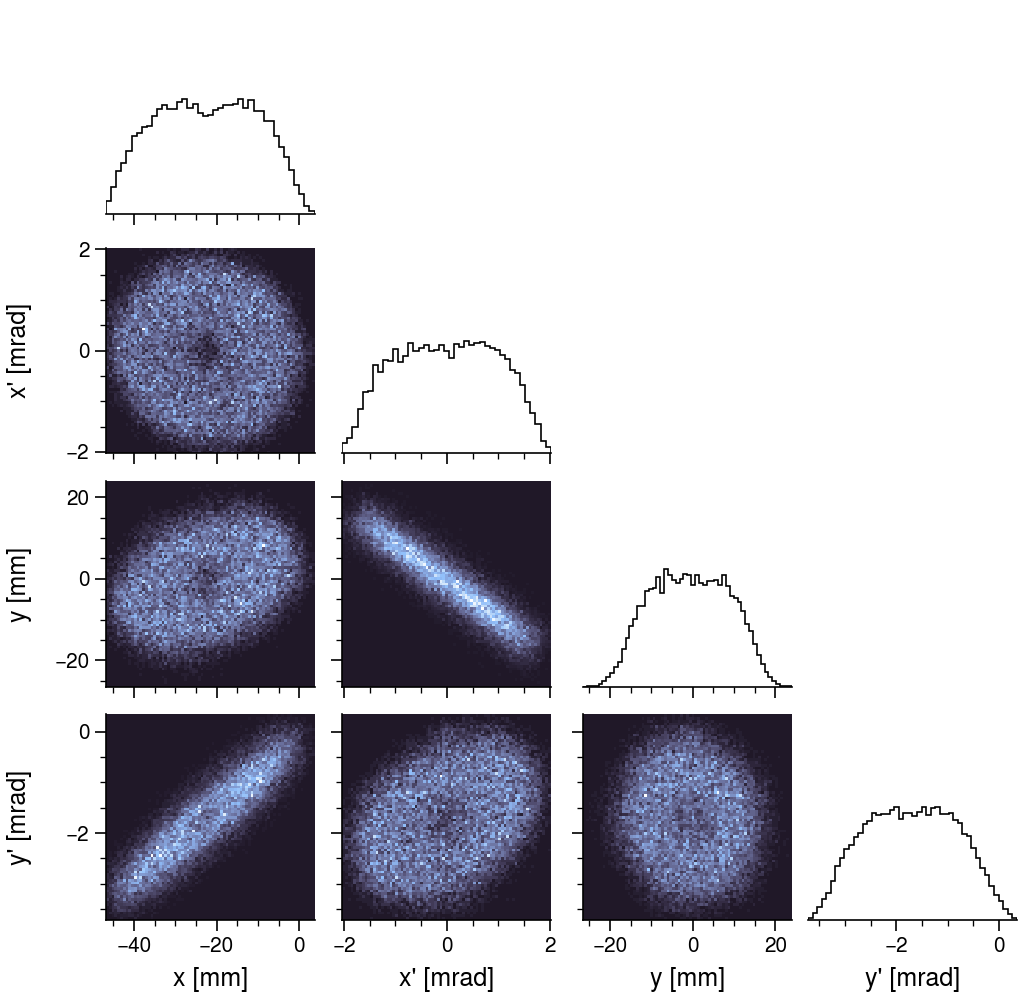

In [943]:
axes = myplt.corner(coords_foil_frame[-1][:, :4], **plot_kws)
plt.savefig('_output/figures/corner4D_turn{}.png'.format(turn), **savefig_kws)

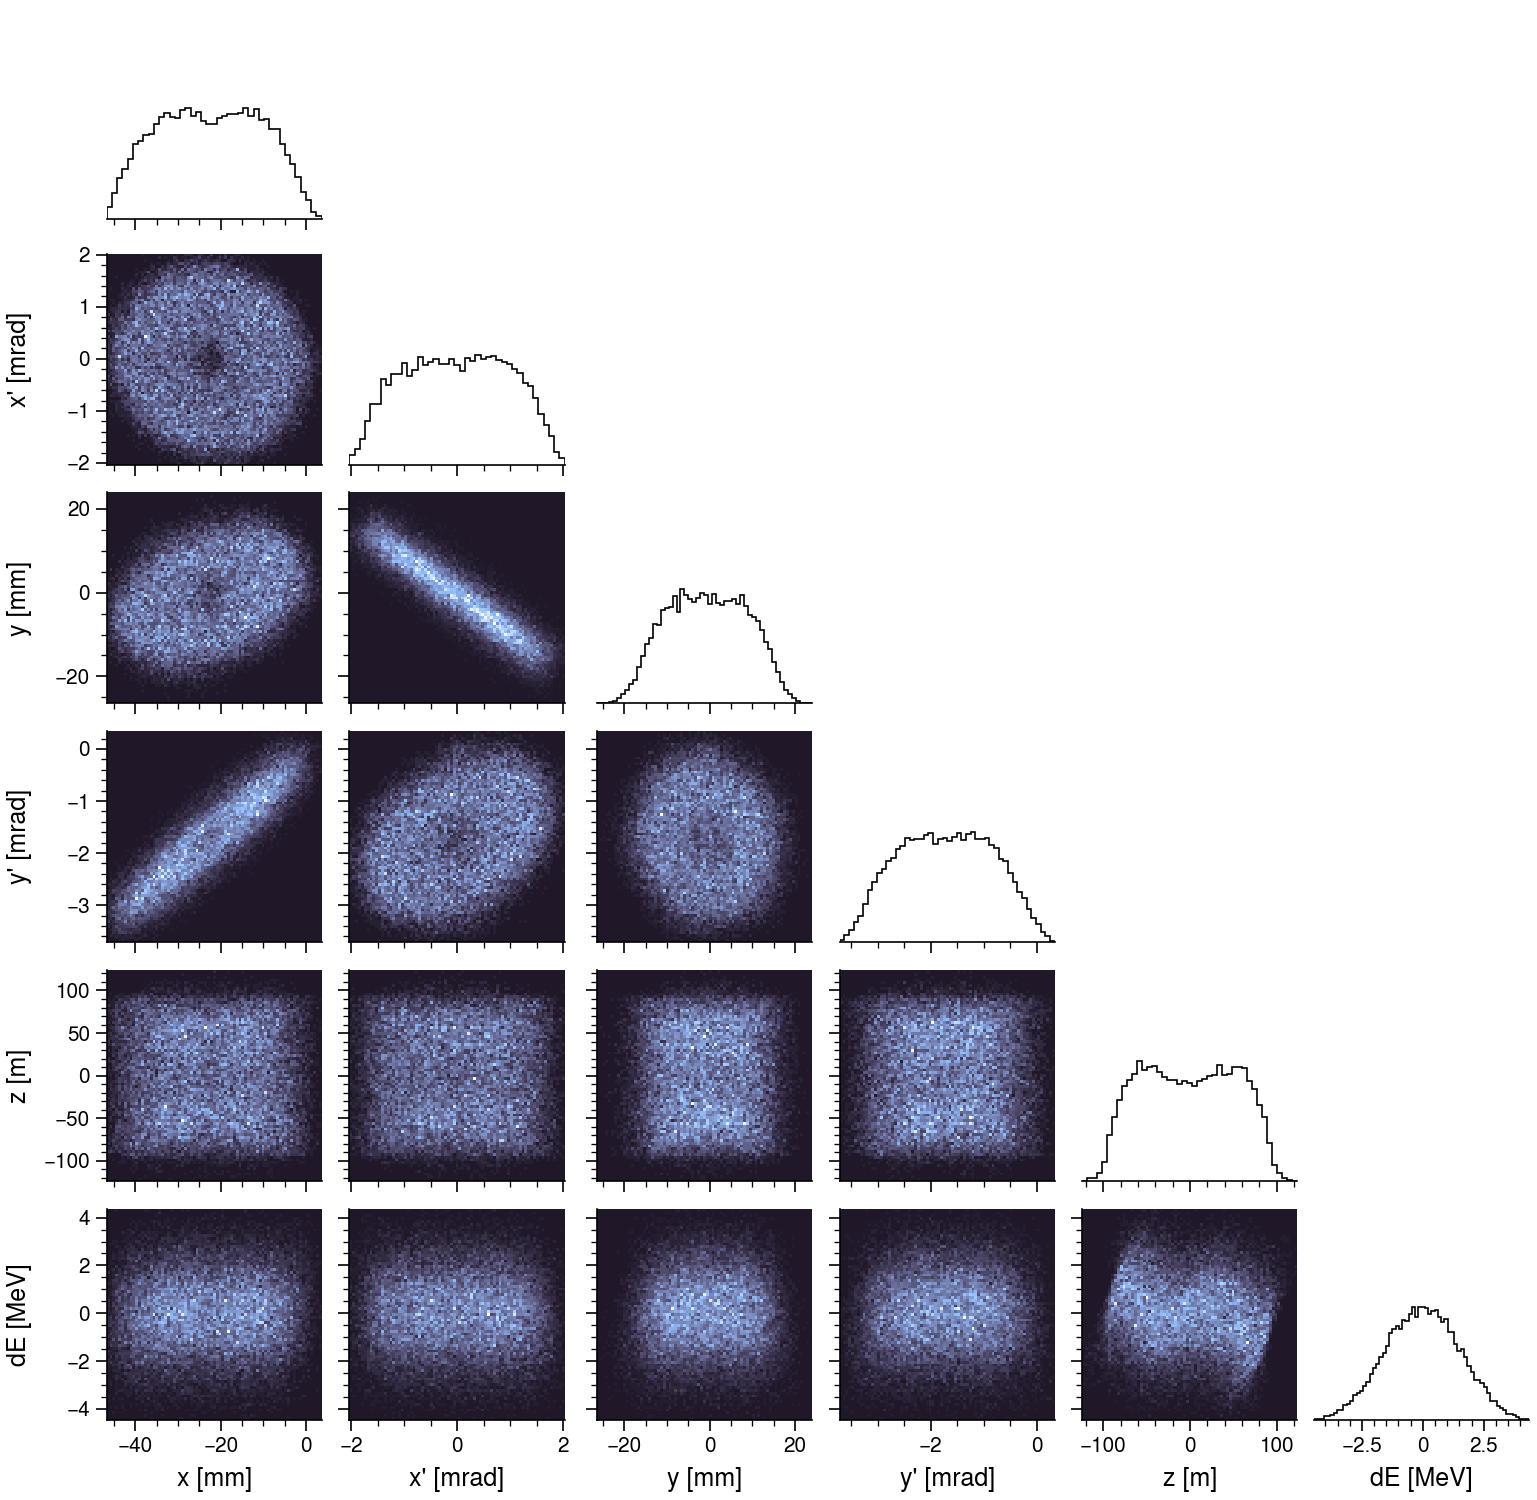

In [944]:
axes = myplt.corner(coords_foil_frame[-1], **plot_kws)
plt.close()
limits = [ax.get_xlim() for ax in axes[-1, :]]
limits[4] = (-248/2, 248/2)
axes = myplt.corner(coords_foil_frame[-1], limits=limits, **plot_kws)
plt.savefig('_output/figures/corner6D_turn{}.png'.format(turn), **savefig_kws)

In [945]:
anim_kws = dict(skip=19, keep_last=True, text_fmt='Turn = {}', 
                limits=limits, 
                bins=bins, pad=pad, hist_height_frac=hist_height_frac)

In [946]:
anim = myanim.corner(coords_foil_frame, dims=4, **anim_kws)
anim.save('_output/figures/corner4D.mp4', dpi=350, fps=5)

100%|██████████| 16/16 [00:00<00:00, 65.41it/s]


In [947]:
# anim = myanim.corner(coords_foil_frame, dims=6, **anim_kws)
# anim.save('_output/figures/corner6D.mp4', dpi=350, fps=5)

In [948]:
# i = 0
# X_onepart = np.array([X[i, :] for X in coords_foil_frame])

# axes = myplt.corner(X_onepart, kind='scatter', c='steelblue', pad=0.1)
# plt.savefig('_output/figures/corner_part{}.png'.format(i), **savefig_kws)

In [949]:
# anim = myanim.corner_onepart(
#     X_onepart[:50], show_history=True, skip=0, pad=0.35, text_fmt='Turn = {}', 
#     zero_center=False, history_kws=dict(ms=5, color='lightgrey'),
# )
# anim.save('_output/figures/corner_part{}.mp4'.format(i), dpi=350, fps=5)